In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from PIL import Image
import os

# Increase the maximum image pixels limit
Image.MAX_IMAGE_PIXELS = None

def resize_images(input_folder, output_folder, max_size=1200):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Check if the input path is a file
    if os.path.isfile(input_folder) and any(input_folder.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp']):
        # Extract the filename from the input path
        filename = os.path.basename(input_folder)

        # Set the output path
        output_path = os.path.join(output_folder, filename)

        # Open the image
        with Image.open(input_folder) as img:
            # Resize the image while maintaining the aspect ratio
            img.thumbnail((max_size, max_size))

            # Save the resized image to the output folder
            img.save(output_path)
    else:
        print("Invalid input path. Please provide a valid image file.")

if __name__ == "__main__":
    # Specify the input and output folders
    input_file = "/content/drive/MyDrive/Cognition Dysfunction/ResetFig/Fig1.png"
    output_folder = "/content/drive/MyDrive/Cognition Dysfunction/ResetFig/New Fig/"

    # Set the maximum size for width or height
    max_size = 1200

    # Resize image
    resize_images(input_file, output_folder, max_size)

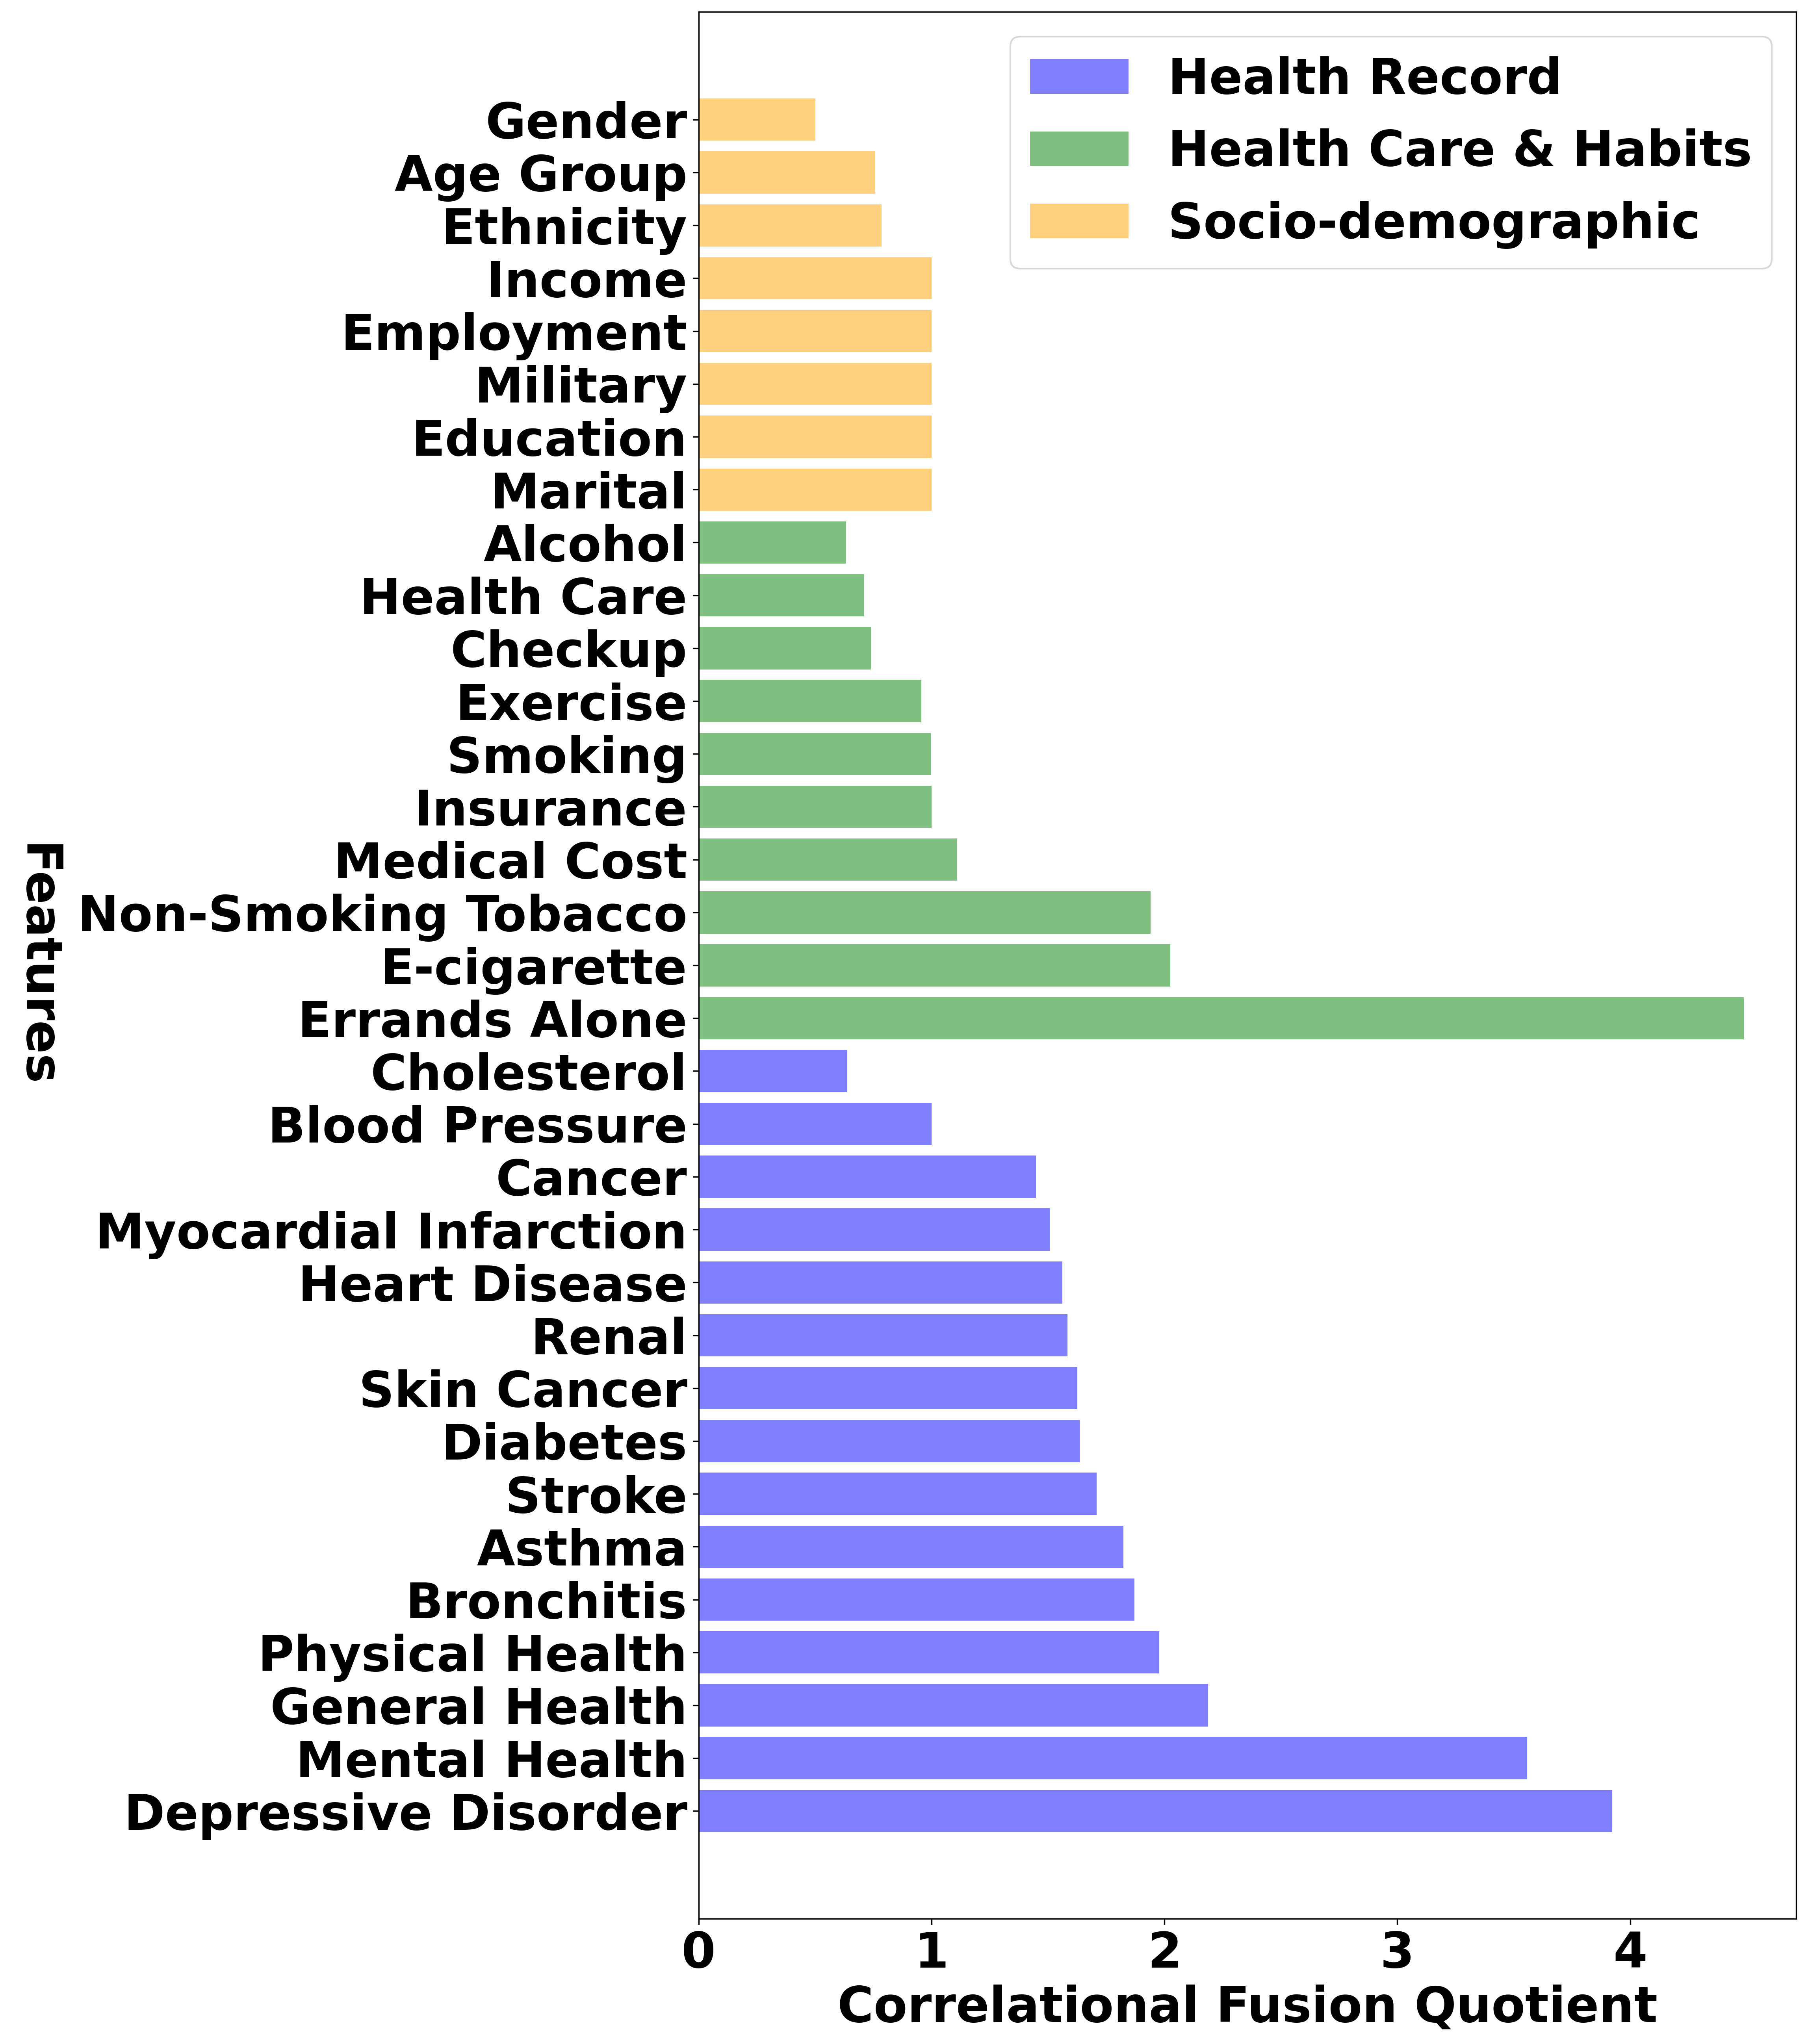

In [ ]:
# Define the feature importance data
health_record_features = {
    "Blood Pressure": 1,
	  "Cholesterol": 0.6373,
    "Myocardial Infarction": 1.5085,
    "Heart Disease": 1.5615,
   	"Stroke": 1.708,
    "Asthma": 1.823,
    "Bronchitis": 1.871,
    "Depressive Disorder": 3.9235,
    "Renal": 1.584,
    "Diabetes": 1.6355,
    "Skin Cancer": 1.6265,
    "Cancer": 1.4475,
    "General Health": 2.187,
    "Physical Health": 1.9785,
    "Mental Health": 3.557,
}

health_care_habits_features = {
    "Insurance": 1.0,
    "Health Care": 0.711,
    "Medical Cost": 1.1075,
    "Checkup": 0.74,
    "Exercise": 0.9565,
    "Smoking": 0.9965,
    "Non-Smoking Tobacco": 1.941,
    "E-cigarette": 2.025,
    "Alcohol": 0.633,
    "Errands Alone": 4.4885,
}

socio_demographic_features = {
    "Gender": 0.5007,
  	"Age Group": 0.758,
  	"Marital": 1.0,
  	"Education": 1.0,
  	"Military": 1.0,
  	"Employment": 1.0,
  	"Income": 1.0,
  	"Ethnicity": 0.7852,
}

# Combine all features
all_features = {
    "Health Record": health_record_features,
    "Health Care & Habits": health_care_habits_features,
    "Socio-demographic": socio_demographic_features,
}

# Sort features by importance
sorted_features = {domain: {k: v for k, v in sorted(features.items(), key=lambda item: item[1], reverse=True)}
                   for domain, features in all_features.items()}

# Plotting
plt.figure(figsize=(16, 18))

colors = {'Health Record': 'blue', 'Health Care & Habits': 'green', 'Socio-demographic': 'orange'}

index = 0
for domain, features in sorted_features.items():
    plt.barh(range(index, index + len(features)), list(features.values()), color=colors[domain], alpha=0.5, label=domain)
    index += len(features)

plt.xlabel('Correlational Fusion Quotient', fontsize = 30, weight = 'bold')
plt.ylabel('Features', fontsize = 30, weight = 'bold', rotation=270, labelpad=40)
plt.yticks(range(index), [feature for features in sorted_features.values() for feature in features.keys()], rotation=360)
# plt.title('Feature Importance across Different Domains')
plt.legend()
plt.tight_layout()
plt.show()

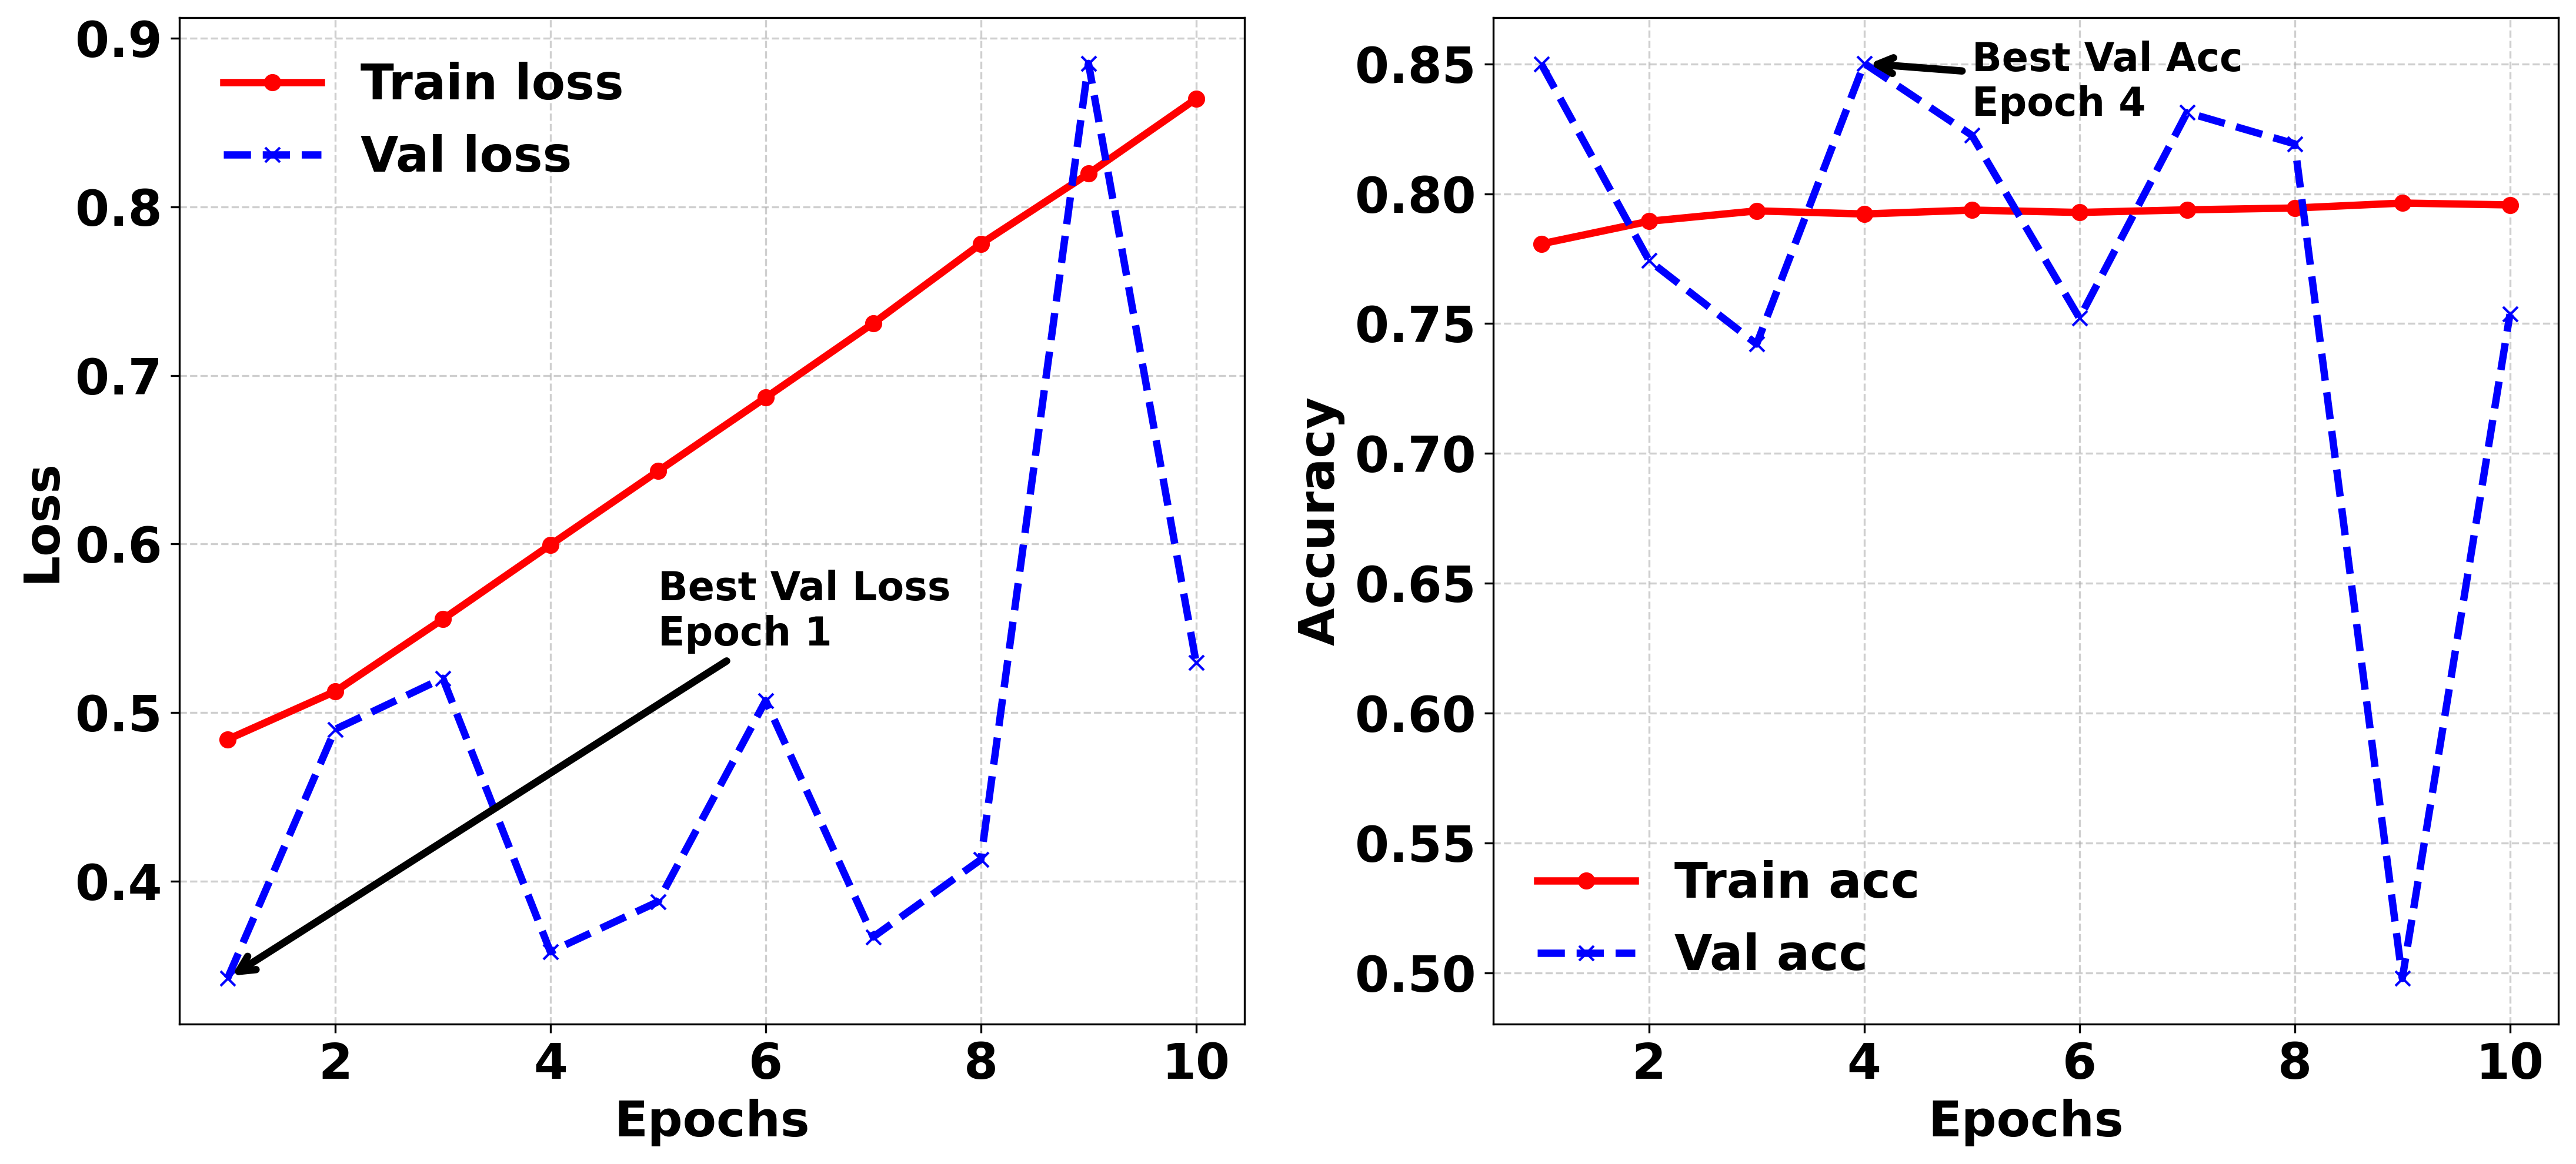

In [ ]:
# Data from the given information
epochs = range(1, 11)  # There are 10 epochs in this data
train_loss = [0.4841, 0.5126, 0.5554, 0.5995, 0.6432, 0.6868, 0.7309, 0.7780, 0.8196, 0.8640]
train_accuracy = [0.7807, 0.7894, 0.7934, 0.7922, 0.7937, 0.7928, 0.7938, 0.7945, 0.7964, 0.7957]
val_loss = [0.3424, 0.4901, 0.5204, 0.3582, 0.3879, 0.5071, 0.3670, 0.4129, 0.8850, 0.5298]
val_accuracy = [0.8499, 0.7743, 0.7421, 0.8502, 0.8225, 0.7521, 0.8313, 0.8192, 0.4978, 0.7536]

# Create a figure with two subplots
plt.figure(figsize=(15, 7))

# Plotting the training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Train loss', marker='o', linestyle='-', linewidth=3)
plt.plot(epochs, val_loss, 'b', label='Val loss', marker='x', linestyle='--', linewidth=3)
plt.xlabel('Epochs', weight='bold')
plt.ylabel('Loss', weight='bold')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight the epoch with the best validation loss
best_val_loss_epoch = epochs[val_loss.index(min(val_loss))]
plt.annotate(f'Best Val Loss\nEpoch {best_val_loss_epoch}', xy=(best_val_loss_epoch, min(val_loss)),
             xytext=(5, 0.54),  # Adjust the xytext coordinates here
             arrowprops=dict(arrowstyle='->', color='black', linewidth=3), fontsize=16)

# Plotting the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Train acc', marker='o', linestyle='-', linewidth=3)
plt.plot(epochs, val_accuracy, 'b', label='Val acc', marker='x', linestyle='--', linewidth=3)
plt.xlabel('Epochs', weight='bold')
plt.ylabel('Accuracy', weight='bold')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight the epoch with the best validation accuracy
best_val_acc_epoch = epochs[val_accuracy.index(max(val_accuracy))]
plt.annotate(f'Best Val Acc\nEpoch {best_val_acc_epoch}', xy=(best_val_acc_epoch, max(val_accuracy)),
             xytext=(5, 0.83),  # Adjust the xytext coordinates here
             arrowprops=dict(arrowstyle='->', color='black', linewidth=3), fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/Cognition Dysfunction/Dataset/ZIP/LLCP2021XPT.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall(
		path="/content/drive/MyDrive/Cognition Dysfunction/Dataset/XPT/")
		"""

In [ ]:
"""
# Read the .xpt file using pandas
data = pd.read_sas('/content/drive/MyDrive/Cognition Dysfunction/Dataset/XPT/LLCP2021.XPT ')

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/BRFSS2021.csv', index=False)
"""

<ipython-input-6-e69650b1eaa4>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data = pd.read_sas('/content/drive/MyDrive/Cognition Dysfunction/Dataset/XPT/LLCP2021.XPT ')
<ipython-input-6-e69650b1eaa4>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data = pd.read_sas('/content/drive/MyDrive/Cognition Dysfunction/Dataset/XPT/LLCP2021.XPT ')
<ipython-input-6-e69650b1eaa4>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

In [ ]:
# Importing Dataset
BRFSS2021 = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/BRFSS2021.csv')

In [ ]:
# Dataset size (row, column)
BRFSS2021.shape

(438693, 303)

In [ ]:
# Target label data count hueing class
class_counts = BRFSS2021['DECIDE'].value_counts()

print(class_counts)

2.0    372376
1.0     46337
7.0      2138
9.0       999
Name: DECIDE, dtype: int64


In [ ]:
# Feature selection
DF = BRFSS2021[['BPHIGH6', 'TOLDHI3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'CHCSCNCR', 'CHCOCNCR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SEXVAR', '_AGE_G', 'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1', 'INCOME3', '_RACE', '_SMOKER3', 'USENOW3', 'ECIGNOW1', '_RFDRHV7', 'DIFFALON', 'DECIDE']]

In [ ]:
# Dataset size (row, column)
DF.shape

(438693, 34)

In [ ]:
# Null values
DF.isnull().sum()

BPHIGH6         2
TOLDHI3     60836
CVDINFR4        2
CVDCRHD4        2
CVDSTRK3        2
ASTHMA3         2
CHCCOPD3        3
ADDEPEV3        3
CHCKDNY2        3
DIABETE4        3
CHCSCNCR        2
CHCOCNCR        3
GENHLTH         4
PHYSHLTH        3
MENTHLTH        2
PRIMINSR        3
PERSDOC3        2
MEDCOST1        5
CHECKUP1        2
EXERANY2        2
SEXVAR          0
_AGE_G          0
MARITAL         5
EDUCA           5
VETERAN3     1636
EMPLOY1      3588
INCOME3      8847
_RACE           0
_SMOKER3        0
USENOW3     21989
ECIGNOW1    23025
_RFDRHV7        0
DIFFALON    19853
DECIDE      16843
dtype: int64

In [ ]:
# Count the total number of rows with missing values
total_rows_with_missing = DF.isnull().any(axis=1).sum()

print(f'Total rows with missing values: {total_rows_with_missing}')

Total rows with missing values: 80200


In [ ]:
# Define the refuse values for each column
refuse_values = {
    'EMPLOY1': [9],
    'PRIMINSR': [77, 99],
    'INCOME3': [77, 99],
}

# Initialize a variable to count the number of rows with refuse values
rows_with_refuse_values = 0

# Iterate through columns and count rows with refuse values
for column, refuse in refuse_values.items():
    if column in DF.columns:
        rows_with_refuse_values += len(DF[DF[column].isin(refuse)])

# For columns without specified refuse values, count rows with refuse values
for column in DF.columns:
    if column not in refuse_values:
        refuse = [7, 9, 77, 99, 777, 999, 7777, 9999, 77777, 99999, 777777, 999999]
        rows_with_refuse_values += len(DF[DF[column].isin(refuse)])

# Print the total number of rows with refuse values
print(f'Total number of rows with refuse values: {rows_with_refuse_values}')

Total number of rows with refuse values: 273850


In [ ]:
# Cleaning nulls
DF = DF.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'EMPLOY1': [9],
    'PRIMINSR': [77, 99],
    'INCOME3': [77, 99],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in DF.columns:
        DF = DF[~DF[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in DF.columns:
    if column not in refuse_values:
        refuse = [7, 9, 77, 99, 777, 999, 7777, 9999, 77777, 99999, 777777, 999999]
        DF = DF[~DF[column].isin(refuse)]

In [ ]:
# Dataset size (row, column)
DF.shape

(242218, 34)

In [ ]:
# Null values
DF.isnull().sum()

BPHIGH6     0
TOLDHI3     0
CVDINFR4    0
CVDCRHD4    0
CVDSTRK3    0
ASTHMA3     0
CHCCOPD3    0
ADDEPEV3    0
CHCKDNY2    0
DIABETE4    0
CHCSCNCR    0
CHCOCNCR    0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
PRIMINSR    0
PERSDOC3    0
MEDCOST1    0
CHECKUP1    0
EXERANY2    0
SEXVAR      0
_AGE_G      0
MARITAL     0
EDUCA       0
VETERAN3    0
EMPLOY1     0
INCOME3     0
_RACE       0
_SMOKER3    0
USENOW3     0
ECIGNOW1    0
_RFDRHV7    0
DIFFALON    0
DECIDE      0
dtype: int64

## Proposed Weighted Fusion Selection

Although only the feature importance of the selected variables is presented, the method was applied across the entire dataset to identify the most relevant features.

### Domain wise Chi-squared and P-value

In [ ]:
from scipy.stats import chi2_contingency

# Explore the relationship between the input columns and the target variable
health_records = ["BPHIGH6", "TOLDHI3", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "CHCCOPD3", "ADDEPEV3", "CHCKDNY2", "DIABETE4", "CHCSCNCR", "CHCOCNCR", "GENHLTH", "PHYSHLTH", "MENTHLTH"]

for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF["DECIDE"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, p-value = {p}")

BPHIGH6 vs Cognition Dysfunction History: Chi-squared = 10532.829046274928, p-value = 0.0
TOLDHI3 vs Cognition Dysfunction History: Chi-squared = 2893.638481438436, p-value = 0.0
CVDINFR4 vs Cognition Dysfunction History: Chi-squared = 21250.291440668167, p-value = 0.0
CVDCRHD4 vs Cognition Dysfunction History: Chi-squared = 22370.983186302565, p-value = 0.0
CVDSTRK3 vs Cognition Dysfunction History: Chi-squared = 25443.61002568742, p-value = 0.0
ASTHMA3 vs Cognition Dysfunction History: Chi-squared = 27882.376059109567, p-value = 0.0
CHCCOPD3 vs Cognition Dysfunction History: Chi-squared = 28888.785824673112, p-value = 0.0
ADDEPEV3 vs Cognition Dysfunction History: Chi-squared = 72134.25701706977, p-value = 0.0
CHCKDNY2 vs Cognition Dysfunction History: Chi-squared = 22828.946027019472, p-value = 0.0
DIABETE4 vs Cognition Dysfunction History: Chi-squared = 23922.32548168919, p-value = 0.0
CHCSCNCR vs Cognition Dysfunction History: Chi-squared = 23728.387950188404, p-value = 0.0
CHCOCN

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["BPHIGH6", "TOLDHI3", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "CHCCOPD3", "ADDEPEV3", "CHCKDNY2", "DIABETE4", "CHCSCNCR", "CHCOCNCR", "GENHLTH", "PHYSHLTH", "MENTHLTH"]

# Calculate chi-squared values
chi2_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures
combined_importance = [(chi2 + mi + imp + (1/rank)) / 4 for chi2, mi, imp, rank in zip(chi2_values, mutual_info, tree_importance, rfe_ranking)]

# Combine chi-squared, mutual information, tree importance, and RFE ranking
for column, chi2, mi, imp, rank, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, Combined Importance = {importance}")

BPHIGH6 vs Cognition Dysfunction History: Chi-squared = 668.4406548100998, Mutual Information = 0.026895667894338393, Tree Importance = 0.04105904201767094, RFE Ranking = 6, Combined Importance = 167.1688190466696
TOLDHI3 vs Cognition Dysfunction History: Chi-squared = 670.8937777261431, Mutual Information = 0.03740082812029266, Tree Importance = 0.031424082807514665, RFE Ranking = 7, Combined Importance = 167.776364944982
CVDINFR4 vs Cognition Dysfunction History: Chi-squared = 738.960990513825, Mutual Information = 0.05597255985005489, Tree Importance = 0.018790016157295142, RFE Ranking = 14, Combined Importance = 184.7767954153152
CVDCRHD4 vs Cognition Dysfunction History: Chi-squared = 785.2493063877411, Mutual Information = 0.05918713896822281, Tree Importance = 0.01901423470307765, RFE Ranking = 12, Combined Importance = 196.35271027368643
CVDSTRK3 vs Cognition Dysfunction History: Chi-squared = 2074.1006848242155, Mutual Information = 0.05266748159233603, Tree Importance = 0.017

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["BPHIGH6", "TOLDHI3", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "CHCCOPD3", "ADDEPEV3", "CHCKDNY2", "DIABETE4", "CHCSCNCR", "CHCOCNCR", "GENHLTH", "PHYSHLTH", "MENTHLTH"]

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures
combined_importance = [(chi2 + mi + imp + (1/rank) + (-1 * p)) / 5 for chi2, mi, imp, rank, p in zip(chi2_values, mutual_info, tree_importance, rfe_ranking, p_values)]

# Combine chi-squared, mutual information, tree importance, RFE ranking, and p-values
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

BPHIGH6 vs Cognition Dysfunction History: Chi-squared = 668.4406548100998, Mutual Information = 0.026301758942474995, Tree Importance = 0.04105904201767094, RFE Ranking = 6, p-value = 1.462432462164299e-144, Combined Importance = 133.73493645554532
TOLDHI3 vs Cognition Dysfunction History: Chi-squared = 670.8937777261431, Mutual Information = 0.03817455217960841, Tree Importance = 0.031424082807514665, RFE Ranking = 7, p-value = 6.386095842486345e-148, Combined Importance = 134.22124670079745
CVDINFR4 vs Cognition Dysfunction History: Chi-squared = 738.960990513825, Mutual Information = 0.056009861501713054, Tree Importance = 0.018790016157295142, RFE Ranking = 14, p-value = 1.0085636456807741e-162, Combined Importance = 147.8214437925825
CVDCRHD4 vs Cognition Dysfunction History: Chi-squared = 785.2493063877411, Mutual Information = 0.05930635324832645, Tree Importance = 0.01901423470307765, RFE Ranking = 12, p-value = 8.692898796965623e-173, Combined Importance = 157.08219206180516
C

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["BPHIGH6", "TOLDHI3", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "CHCCOPD3", "ADDEPEV3", "CHCKDNY2", "DIABETE4", "CHCSCNCR", "CHCOCNCR", "GENHLTH", "PHYSHLTH", "MENTHLTH"]

# Calculate class frequencies
class_counts = DF[target_variable].value_counts()
class_weights = 1 / class_counts

# Define weights for each method dynamically based on class imbalance
weights = {
    'chi2': class_weights,
    'mutual_info': class_weights,
    'tree_importance': class_weights,
    'rfe_ranking': class_weights,  # Using the same weight as mutual_info for simplicity
    'p_values': class_weights
}

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures with weights
combined_importance = [(chi2 * weights['chi2'][cls] + mi * weights['mutual_info'][cls] + imp * weights['tree_importance'][cls] + (1/rank) * weights['rfe_ranking'][cls] + (-1 * p) * weights['p_values'][cls]) / sum(weights.values()) for chi2, mi, imp, rank, p, cls in zip(chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, DF[target_variable])]

# Print the combined importance
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

BPHIGH6 vs Cognition Dysfunction History: Chi-squared = 668.4406548100998, Mutual Information = 0.026683219716761464, Tree Importance = 0.03346842870451271, RFE Ranking = 6, p-value = 1.462432462164299e-144, Combined Importance = DECIDE
2.0    133.733495
1.0     13.499175
Name: count, dtype: float64
TOLDHI3 vs Cognition Dysfunction History: Chi-squared = 670.8937777261431, Mutual Information = 0.037350297229016505, Tree Importance = 0.024082755614367343, RFE Ranking = 8, p-value = 6.386095842486345e-148, Combined Importance = DECIDE
2.0    134.216042
1.0     13.547884
Name: count, dtype: float64
CVDINFR4 vs Cognition Dysfunction History: Chi-squared = 738.960990513825, Mutual Information = 0.054537929602053836, Tree Importance = 0.013636790127206085, RFE Ranking = 14, p-value = 1.0085636456807741e-162, Combined Importance = DECIDE
2.0    147.820119
1.0     14.921091
Name: count, dtype: float64
CVDCRHD4 vs Cognition Dysfunction History: Chi-squared = 785.2493063877411, Mutual Informatio

In [ ]:
from scipy.stats import chi2_contingency

# Explore the relationship between the input columns and the target variable
health_care_habits = ["PRIMINSR", "PERSDOC3", "MEDCOST1", "CHECKUP1", "EXERANY2", "_SMOKER3", "USENOW3", "ECIGNOW1", "_RFDRHV7", "DIFFALON"]

for column in health_care_habits:
    contingency_table = pd.crosstab(DF[column], DF["DECIDE"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, p-value = {p}")

PRIMINSR vs Cognition Dysfunction History: Chi-squared = 15308.425765007836, p-value = 0.0
PERSDOC3 vs Cognition Dysfunction History: Chi-squared = 6465.699813980647, p-value = 0.0
MEDCOST1 vs Cognition Dysfunction History: Chi-squared = 18605.904580132814, p-value = 0.0
CHECKUP1 vs Cognition Dysfunction History: Chi-squared = 7354.894115279202, p-value = 0.0
EXERANY2 vs Cognition Dysfunction History: Chi-squared = 13991.094504783698, p-value = 0.0
_SMOKER3 vs Cognition Dysfunction History: Chi-squared = 15188.685101166931, p-value = 0.0
USENOW3 vs Cognition Dysfunction History: Chi-squared = 44149.39911000908, p-value = 0.0
ECIGNOW1 vs Cognition Dysfunction History: Chi-squared = 46746.24524383503, p-value = 0.0
_RFDRHV7 vs Cognition Dysfunction History: Chi-squared = 4062.736445509751, p-value = 0.0
DIFFALON vs Cognition Dysfunction History: Chi-squared = 137337.41430928925, p-value = 0.0


In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["PRIMINSR", "PERSDOC3", "MEDCOST1", "CHECKUP1", "EXERANY2", "_SMOKER3", "USENOW3", "ECIGNOW1", "_RFDRHV7", "DIFFALON"]

# Calculate chi-squared values
chi2_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures
combined_importance = [(chi2 + mi + imp + (1/rank)) / 4 for chi2, mi, imp, rank in zip(chi2_values, mutual_info, tree_importance, rfe_ranking)]

# Combine chi-squared, mutual information, tree importance, and RFE ranking
for column, chi2, mi, imp, rank, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, Combined Importance = {importance}")

PRIMINSR vs Cognition Dysfunction History: Chi-squared = 6575.7204219951245, Mutual Information = 0.013642372723741136, Tree Importance = 0.1659836986218263, RFE Ranking = 2, Combined Importance = 1644.1000120166175
PERSDOC3 vs Cognition Dysfunction History: Chi-squared = 794.5929574012046, Mutual Information = 0.01911018017304733, Tree Importance = 0.05595780130423856, RFE Ranking = 7, Combined Importance = 198.70272063138472
MEDCOST1 vs Cognition Dysfunction History: Chi-squared = 5882.355491737555, Mutual Information = 0.0676951792503171, Tree Importance = 0.07284668675351325, RFE Ranking = 3, Combined Importance = 1470.7073417342228
CHECKUP1 vs Cognition Dysfunction History: Chi-squared = 41.011469235435314, Mutual Information = 0.026430177933937538, Tree Importance = 0.08143628001102698, RFE Ranking = 6, Combined Importance = 10.321500590011736
EXERANY2 vs Cognition Dysfunction History: Chi-squared = 3367.4883008591055, Mutual Information = 0.03795645008143267, Tree Importance = 0

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["PRIMINSR", "PERSDOC3", "MEDCOST1", "CHECKUP1", "EXERANY2", "_SMOKER3", "USENOW3", "ECIGNOW1", "_RFDRHV7", "DIFFALON"]

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures
combined_importance = [(chi2 + mi + imp + (1/rank) + (-1 * p)) / 5 for chi2, mi, imp, rank, p in zip(chi2_values, mutual_info, tree_importance, rfe_ranking, p_values)]

# Combine chi-squared, mutual information, tree importance, RFE ranking, and p-values
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

PRIMINSR vs Cognition Dysfunction History: Chi-squared = 6575.7204219951245, Mutual Information = 0.013187358893750112, Tree Importance = 0.1659836986218263, RFE Ranking = 2, p-value = 0.0, Combined Importance = 1315.279918610528
PERSDOC3 vs Cognition Dysfunction History: Chi-squared = 794.5929574012046, Mutual Information = 0.01905290302141549, Tree Importance = 0.05595780130423856, RFE Ranking = 7, p-value = 2.8597733898306143e-173, Combined Importance = 158.96216504967745
MEDCOST1 vs Cognition Dysfunction History: Chi-squared = 5882.355491737555, Mutual Information = 0.06850663282517933, Tree Importance = 0.07284668675351325, RFE Ranking = 3, p-value = 0.0, Combined Importance = 1176.5660356780932
CHECKUP1 vs Cognition Dysfunction History: Chi-squared = 41.011469235435314, Mutual Information = 0.025434114370882277, Tree Importance = 0.08143628001102698, RFE Ranking = 6, p-value = 2.6731719196620524e-08, Combined Importance = 8.257001253950433
EXERANY2 vs Cognition Dysfunction Histor

In [ ]:
from scipy.stats import chi2_contingency

# Explore the relationship between the input columns and the target variable
socio_demographic = ["SEXVAR", "_AGE_G", "MARITAL", "EDUCA", "VETERAN3", "EMPLOY1", "INCOME3", "_RACE"]

for column in socio_demographic:
    contingency_table = pd.crosstab(DF[column], DF["DECIDE"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, p-value = {p}")

SEXVAR vs Cognition Dysfunction History: Chi-squared = 650.0388160549876, p-value = 1.4286993908918492e-140
_AGE_G vs Cognition Dysfunction History: Chi-squared = 2481.3239311265806, p-value = 0.0
MARITAL vs Cognition Dysfunction History: Chi-squared = 14266.001550709065, p-value = 0.0
EDUCA vs Cognition Dysfunction History: Chi-squared = 20514.069598737726, p-value = 0.0
VETERAN3 vs Cognition Dysfunction History: Chi-squared = 19624.236390093498, p-value = 0.0
EMPLOY1 vs Cognition Dysfunction History: Chi-squared = 40340.513078594784, p-value = 0.0
INCOME3 vs Cognition Dysfunction History: Chi-squared = 27073.121742365136, p-value = 0.0
_RACE vs Cognition Dysfunction History: Chi-squared = 4650.8822083982295, p-value = 0.0


In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["SEXVAR", "_AGE_G", "MARITAL", "EDUCA", "VETERAN3", "EMPLOY1", "INCOME3", "_RACE"]

# Calculate chi-squared values
chi2_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures
combined_importance = [(chi2 + mi + imp + (1/rank)) / 4 for chi2, mi, imp, rank in zip(chi2_values, mutual_info, tree_importance, rfe_ranking)]

# Combine chi-squared, mutual information, tree importance, and RFE ranking
for column, chi2, mi, imp, rank, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, Combined Importance = {importance}")

SEXVAR vs Cognition Dysfunction History: Chi-squared = 448.4561414728005, Mutual Information = 0.03542924620858168, Tree Importance = 0.026669198036178766, RFE Ranking = 7, Combined Importance = 112.16527426497561
_AGE_G vs Cognition Dysfunction History: Chi-squared = 958.4089357851326, Mutual Information = 0.01763258433621906, Tree Importance = 0.12793148471316174, RFE Ranking = 3, Combined Importance = 239.72195829687882
MARITAL vs Cognition Dysfunction History: Chi-squared = 3487.6098263069657, Mutual Information = 0.017707218640858446, Tree Importance = 0.12175557093753431, RFE Ranking = 5, Combined Importance = 871.987322274136
EDUCA vs Cognition Dysfunction History: Chi-squared = 4216.532740548953, Mutual Information = 0.024793430088281943, Tree Importance = 0.12028294363673588, RFE Ranking = 4, Combined Importance = 1054.2319542306698
VETERAN3 vs Cognition Dysfunction History: Chi-squared = 35.46173433610157, Mutual Information = 0.03676636862970706, Tree Importance = 0.02123635

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["SEXVAR", "_AGE_G", "MARITAL", "EDUCA", "VETERAN3", "EMPLOY1", "INCOME3", "_RACE"]

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures
combined_importance = [(chi2 + mi + imp + (1/rank) + (-1 * p)) / 5 for chi2, mi, imp, rank, p in zip(chi2_values, mutual_info, tree_importance, rfe_ranking, p_values)]

# Combine chi-squared, mutual information, tree importance, RFE ranking, and p-values
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

SEXVAR vs Cognition Dysfunction History: Chi-squared = 448.4561414728005, Mutual Information = 0.034123582829552745, Tree Importance = 0.026669198036178766, RFE Ranking = 7, p-value = 1.5635190740770101e-99, Combined Importance = 89.73195827930468
_AGE_G vs Cognition Dysfunction History: Chi-squared = 958.4089357851326, Mutual Information = 0.017313863007816677, Tree Importance = 0.12793148471316174, RFE Ranking = 3, p-value = 6.062443325187804e-205, Combined Importance = 191.7775028932374
MARITAL vs Cognition Dysfunction History: Chi-squared = 3487.6098263069657, Mutual Information = 0.01812617761121227, Tree Importance = 0.12175557093753431, RFE Ranking = 5, p-value = 0.0, Combined Importance = 697.5899416111029
EDUCA vs Cognition Dysfunction History: Chi-squared = 4216.532740548953, Mutual Information = 0.025361339906678326, Tree Importance = 0.12028294363673588, RFE Ranking = 4, p-value = 0.0, Combined Importance = 843.3856769664993
VETERAN3 vs Cognition Dysfunction History: Chi-sq

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["SEXVAR", "_AGE_G", "MARITAL", "EDUCA", "VETERAN3", "EMPLOY1", "INCOME3", "_RACE"]

# Calculate class frequencies
class_counts = DF[target_variable].value_counts()
class_weights = 1 / class_counts

# Define weights for each method dynamically based on class imbalance
weights = {
    'chi2': class_weights,
    'mutual_info': class_weights,
    'tree_importance': class_weights,
    'rfe_ranking': class_weights,  # Using the same weight as mutual_info for simplicity
    'p_values': class_weights
}

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Combine all feature importance measures with weights
combined_importance = [(chi2 * weights['chi2'][cls] + mi * weights['mutual_info'][cls] + imp * weights['tree_importance'][cls] + (1/rank) * weights['rfe_ranking'][cls] + (-1 * p) * weights['p_values'][cls]) / sum(weights.values()) for chi2, mi, imp, rank, p, cls in zip(chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, DF[target_variable])]

# Print the combined importance
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

SEXVAR vs Cognition Dysfunction History: Chi-squared = 448.4561414728005, Mutual Information = 0.03411281003736799, Tree Importance = 0.02607578345499869, RFE Ranking = 7, p-value = 1.5635190740770101e-99, Combined Importance = DECIDE
2.0    89.731837
1.0     9.057609
Name: count, dtype: float64
_AGE_G vs Cognition Dysfunction History: Chi-squared = 958.4089357851326, Mutual Information = 0.01673437713012249, Tree Importance = 0.11941803415407885, RFE Ranking = 3, p-value = 6.062443325187804e-205, Combined Importance = DECIDE
2.0    191.775684
1.0     19.358004
Name: count, dtype: float64
MARITAL vs Cognition Dysfunction History: Chi-squared = 3487.6098263069657, Mutual Information = 0.017675097713664156, Tree Importance = 0.1204990530400612, RFE Ranking = 5, p-value = 0.0, Combined Importance = DECIDE
2.0    697.589600
1.0     70.415299
Name: count, dtype: float64
EDUCA vs Cognition Dysfunction History: Chi-squared = 4216.532740548953, Mutual Information = 0.02445178527569869, Tree Im

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["SEXVAR", "_AGE_G", "MARITAL", "EDUCA", "VETERAN3", "EMPLOY1", "INCOME3", "_RACE"]

# Calculate class frequencies
class_counts = DF[target_variable].value_counts()
class_weights = 1 / class_counts

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Initialize combined importance list
combined_importance = np.zeros(len(health_records))

# Combine all feature importance measures with dynamic weights
for cls, weight in class_weights.items():
    cls_mask = DF[target_variable] == cls
    cls_weight = weight / class_weights.sum()

    for i, column in enumerate(health_records):
        chi2 = chi2_values[i]
        mi = mutual_info[i]
        imp = tree_importance[i]
        rank = rfe_ranking[i]
        p = p_values[i]

        feature_importance = (chi2 * cls_weight +
                              mi * cls_weight +
                              imp * cls_weight +
                              (1/rank) * cls_weight +
                              (-1 * p) * cls_weight)

        combined_importance[i] += feature_importance

# Normalize combined importance
combined_importance /= len(class_weights)

# Print the combined importance
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

SEXVAR vs Cognition Dysfunction History: Chi-squared = 448.4561414728005, Mutual Information = 0.03459646583410181, Tree Importance = 0.02607578345499869, RFE Ranking = 7, p-value = 1.5635190740770101e-99, Combined Importance = 224.3298354324734
_AGE_G vs Cognition Dysfunction History: Chi-squared = 958.4089357851326, Mutual Information = 0.017772823311851482, Tree Importance = 0.11941803415407885, RFE Ranking = 3, p-value = 6.062443325187804e-205, Combined Importance = 479.43972998796596
MARITAL vs Cognition Dysfunction History: Chi-squared = 3487.6098263069657, Mutual Information = 0.018868539039645027, Tree Importance = 0.1204990530400612, RFE Ranking = 5, p-value = 0.0, Combined Importance = 1743.9745969495227
EDUCA vs Cognition Dysfunction History: Chi-squared = 4216.532740548953, Mutual Information = 0.024412790757596614, Tree Importance = 0.11602008089832683, RFE Ranking = 4, p-value = 0.0, Combined Importance = 2108.461586710305
VETERAN3 vs Cognition Dysfunction History: Chi-sq

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["CHCSCNCR", "CHCOCNCR", "CVDINFR4", "CHCCOPD3", "CVDCRHD4", "ADDEPEV3", "CHCKDNY2", "DIABETE4", "CVDSTRK3", "ASTHMA3", "TOLDHI3", "BPHIGH6", "PHYSHLTH", "MENTHLTH", "GENHLTH"]

# Calculate class frequencies
class_counts = DF[target_variable].value_counts()
class_weights = 1 / class_counts

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Initialize combined importance list
combined_importance = np.zeros(len(health_records))

# Combine all feature importance measures with dynamic weights
for cls, weight in class_weights.items():
    cls_mask = DF[target_variable] == cls
    cls_weight = weight / class_weights.sum()

    for i, column in enumerate(health_records):
        chi2 = chi2_values[i]
        mi = mutual_info[i]
        imp = tree_importance[i]
        rank = rfe_ranking[i]
        p = p_values[i]

        feature_importance = (chi2 * cls_weight +
                              mi * cls_weight +
                              imp * cls_weight +
                              (1/rank) * cls_weight +
                              (-1 * p) * cls_weight)

        combined_importance[i] += feature_importance

# Normalize combined importance
combined_importance /= len(class_weights)

# Print the combined importance
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

CHCSCNCR vs Cognition Dysfunction History: Chi-squared = 11.979119940708504, Mutual Information = 0.03356428294378455, Tree Importance = 0.018897618697671145, RFE Ranking = 11, p-value = 0.0005379998627147099, Combined Importance = 6.060976466698167
CHCOCNCR vs Cognition Dysfunction History: Chi-squared = 162.42497315680384, Mutual Information = 0.03405607282851375, Tree Importance = 0.020004966710497257, RFE Ranking = 10, p-value = 3.3407580059689144e-37, Combined Importance = 81.28951709817143
CVDINFR4 vs Cognition Dysfunction History: Chi-squared = 738.960990513825, Mutual Information = 0.05743431436498336, Tree Importance = 0.01364060434319908, RFE Ranking = 14, p-value = 1.0085636456807741e-162, Combined Importance = 369.55174700198086
CHCCOPD3 vs Cognition Dysfunction History: Chi-squared = 4282.415647061664, Mutual Information = 0.03922381430549238, Tree Importance = 0.022087516051883825, RFE Ranking = 6, p-value = 0.0, Combined Importance = 2141.321812529344
CVDCRHD4 vs Cogniti

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming DF is your dataframe containing the relevant columns

# Define the target variable
target_variable = "DECIDE"

# Define the input columns
health_records = ["_RFDRHV7", "ECIGNOW1", "USENOW3", "_SMOKER3", "EXERANY2", "PERSDOC3", "CHECKUP1", "PRIMINSR", "MEDCOST1", "DIFFALON"]

# Calculate class frequencies
class_counts = DF[target_variable].value_counts()
class_weights = 1 / class_counts

# Calculate chi-squared values and p-values
chi2_values = []
p_values = []
for column in health_records:
    contingency_table = pd.crosstab(DF[column], DF[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Calculate mutual information
mutual_info = mutual_info_classif(DF[health_records], DF[target_variable])

# Tree-based feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(DF[health_records], DF[target_variable])
tree_importance = rf.feature_importances_

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'), n_features_to_select=1)
rfe.fit(DF[health_records], DF[target_variable])
rfe_ranking = rfe.ranking_

# Initialize combined importance list
combined_importance = np.zeros(len(health_records))

# Combine all feature importance measures with dynamic weights
for cls, weight in class_weights.items():
    cls_mask = DF[target_variable] == cls
    cls_weight = weight / class_weights.sum()

    for i, column in enumerate(health_records):
        chi2 = chi2_values[i]
        mi = mutual_info[i]
        imp = tree_importance[i]
        rank = rfe_ranking[i]
        p = p_values[i]

        feature_importance = (chi2 * cls_weight +
                              mi * cls_weight +
                              imp * cls_weight +
                              (1/rank) * cls_weight +
                              (-1 * p) * cls_weight)

        combined_importance[i] += feature_importance

# Normalize combined importance
combined_importance /= len(class_weights)

# Print the combined importance
for column, chi2, mi, imp, rank, p, importance in zip(health_records, chi2_values, mutual_info, tree_importance, rfe_ranking, p_values, combined_importance):
    print(f"{column} vs Cognition Dysfunction History: Chi-squared = {chi2}, Mutual Information = {mi}, Tree Importance = {imp}, RFE Ranking = {rank}, p-value = {p}, Combined Importance = {importance}")

_RFDRHV7 vs Cognition Dysfunction History: Chi-squared = 26.448883822775223, Mutual Information = 0.05231763846856863, Tree Importance = 0.018592578503889106, RFE Ranking = 10, p-value = 2.7060479781594015e-07, Combined Importance = 13.309896884571444
ECIGNOW1 vs Cognition Dysfunction History: Chi-squared = 2034.8932042832755, Mutual Information = 0.029463326590279282, Tree Importance = 0.06604872713227186, RFE Ranking = 6, p-value = 0.0, Combined Importance = 1017.5776915018325
USENOW3 vs Cognition Dysfunction History: Chi-squared = 34.5082644110459, Mutual Information = 0.048777352948613295, Tree Importance = 0.02359881143701434, RFE Ranking = 9, p-value = 3.2108912238295665e-08, Combined Importance = 17.345875827216865
_SMOKER3 vs Cognition Dysfunction History: Chi-squared = 3662.6105618321535, Mutual Information = 0.035119203160898005, Tree Importance = 0.08769604716555568, RFE Ranking = 4, p-value = 0.0, Combined Importance = 1831.4916885412401
EXERANY2 vs Cognition Dysfunction Hi

In [ ]:
# Dictionary to map old column names to new column names
column_mapping = {
    'BPHIGH6': 'Blood Pressure',
    'TOLDHI3': 'Cholesterol',
    'CVDINFR4': 'Myocardial Infarction',
    'CVDCRHD4': 'Heart Disease',
    'CVDSTRK3': 'Stroke',
    'ASTHMA3': 'Asthma',
    'CHCCOPD3': 'Bronchitis',
    'ADDEPEV3': 'Depressive Disorder',
    'CHCKDNY2': 'Renal Issue',
    'DIABETE4': 'Diabete',
    'CHCSCNCR': 'Skin Cancer',
    'CHCOCNCR': 'Cancer',
    'GENHLTH': 'General Health',
    'PHYSHLTH': 'Physical Health',
    'MENTHLTH': 'Mental Health',
    'PRIMINSR': 'Health Insurance',
    'PERSDOC3': 'Personal Health Care',
    'MEDCOST1': 'Medical Cost',
    'CHECKUP1': 'Routine Check',
    'EXERANY2': 'Exercise',
    'SEXVAR': 'Gendar',
    '_AGE_G': 'Age Group',
    'MARITAL': 'Marrital Status',
    'EDUCA': 'Eduction Status',
    'VETERAN3': 'Military Record',
    'EMPLOY1': 'Employment Status',
    'INCOME3': 'Income',
    '_RACE': 'Ethnicity',
    '_SMOKER3': 'Smoking Status',
    'USENOW3': 'Non-Smoking Tobacco',
    'ECIGNOW1': 'E-cigarette',
    '_RFDRHV7': 'Alcohol Consumption',
    'DIFFALON': 'Errands Alone',
    'DECIDE': 'Cognition Dysfunction'
}

# Rename the columns using the mapping
DF = DF.rename(columns=column_mapping)

In [ ]:
# Target label class count
unique_classes = DF['Cognition Dysfunction'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = DF['Cognition Dysfunction'].value_counts()

print(class_counts)

2.0    220010
1.0     22208
Name: Cognition Dysfunction, dtype: int64


### Train/Test Split

In [ ]:
# Separating data
Healthy = DF[DF['Cognition Dysfunction']==2]
Affected = DF[DF['Cognition Dysfunction']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.30, random_state=42)

In [ ]:
"""
trainAffected.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/Original.csv', index=False)
"""

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['Cognition Dysfunction'], axis=1) # Input features
y_train = train['Cognition Dysfunction'] # Target label

x_test = test.drop(['Cognition Dysfunction'], axis=1) # Input features
y_test = test['Cognition Dysfunction'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 15545


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663
